### Imports

In [1]:
import numpy as np
from scipy.optimize import newton
import pandas as pd
from bond_pricing import bond_coupon_periods, equiv_rate, bond_yield, bond_price

In [2]:
def gov_equiv_yield(y, N, pmt, price, fv, per, tT):
    from scipy.optimize import newton
    
    def f(y): # The function whose zero is to be found
        return (pv(y/per, N*per, pmt/per, fv) * (1 + y/per)**tT) - price
    
    root, status = newton(f, y, full_output=True, disp=False)
    return root

def pv(r, n, pmt, fv, beg=False):
  old_settings = np.seterr(invalid='ignore')
  pvPMT = np.where(r == 0, n, np.divide(1 - (1+r)**-n, r)) * pmt
  np.seterr(**old_settings)
  pvFV = fv / (1 + r)**n
  
  return np.where(beg, (pvPMT + pvFV) * (1 + r), pvPMT + pvFV)

def fv(r, n, pmt, terminal_payment, beg=False):
  old_settings = np.seterr(invalid='ignore')
  fvPMT = np.where(r == 0, n, np.divide((1+r)**n - 1, r)) * pmt
  np.seterr(**old_settings)
  TV = terminal_payment
  
  return np.where(beg, fvPMT * (1 + r) + TV, fvPMT + TV)

def pmt(r, n, pv, fv):
    return (pv - (fv/(1+r)**n)) / np.divide(1 - (1+r)**-n, r)

### US Bond Taxation Basics - US Investor Perspective

After‐tax rate of return is what ultimately matters to an investor and the after‐tax cost of funds is what matters to a borrower.

Discussions about taxation commonly involve four aspects of a cash flow, or accrual:
1. **Source**. Is the income/expense domestic or foreign?
2. **Timing**. Is the income/expense current or deferred?
3. **Character**. Is the cash fl ow ordinary income/expense or a capital gain/ loss?
4. **Exemption**. Is the ordinary income or capital gain exempt from taxation?

- What is the difference between interest income and a capital gain for tax purposes? 
- How and when should the implicit interest income on a zero‐coupon bond be taxed? 
- How should we compare investments in fully taxable corporate bonds and tax‐exempt municipal bonds? 
- How should projected after‐tax rates of return on corporate bonds be calculated?

In principle, **interest payments** are compensation to the investor for the *passage of time*, scaled by the amount of credit and liquidity risk on the underlying debt obligation.

**Capital gains and losses** arise from a change in the value of the bond as signaled by a *change in its yield to maturity*.

Investor who buys a bond at a discount and holds it to maturity does not necessarily merit a capital gain. The bond price is "pulled to par" as time passes, but this is not a change in value to warrant a capital gain. The difference between purchase price and the redemption amount is just interest income and should be taxed at the ordinary income rate, albeit deferred.

**Corporate Bond**: 
- Interest Income (coupon payment): taxable as ordinary interest income.
  - Whenever an investor purchases a bond between coupon dates (wherein the bond has accrued interest paid to the seller at purchase) the first coupon payment closes out / or nets out the accrued interest amount from the coupon payment to reduce taxable income.
- Sale before maturity at price above purchase (purchased at discount):
  - Investor calculates the accrued market discount either 'ratably' (straight-line amortization discount / years to maturity) or using the constant-yield price trajectory from the time of purchase. 
  - The total gain from purchase is broken down into portion that is accrued interest and portion that is capital gains above the accrued interest. 
  - Ordinary income tax is applied to the portion that is accrued interest 
  - Capital gains tax is applied to the portion that is a gain above the accrued interest.
- Held to maturity:
  - All coupons are taxed at ordinary income tax.
  - Discount portion of a market discount bond is also taxed at ordinary income tax as the gain is just deferred interest income.
    - The amount of the premium or discount is the present value of the “excess” or “deficiency in the coupon rate compared to the yield to maturity.
    - The coupon rate is what you are promised to get; the yield is what you need (in order to pay par value).
    - Present value of the deficiency (Yield - Coupon Rate) equals the amount of the discount (face value - price)
  - Premium bonds:
    - In principle, the premium over par is the present value of the “excessive” coupon payments because the coupon rate is greater than the yield to maturity. You are getting more than you need (in order to pay par value). So, for tax purposes, the investor naturally would want to amortize the premium over the lifetime of the bond. That means reducing the amount of taxable interest income each year by the change in constant-yield price.
    - The amount of tax for each period is the interest payment less the amortization of the premium (change in constant-yield price from period to period) times the assumed ordinary tax rate.
    - If the bond is purchased between coupon dates, on the first coupon period, the interest payment is less the paid accrued interest and amortization of the premium. 
- *De minimis* OID (original issue discount):
  - Qualification requires discount at issuance less than **years to maturity times 0.25**.
  - Investor holding the bond to maturity will see a capital gain (equal to the discount portion) that is taxable at the capital gains tax rate at redemption. 
- Original Issue Discount Bonds:
  - The yearly movement along the constant‐yield price trajectory is the reported ordinary interest income to the investor and interest expense to the issuer.
  - An investor who buys and holds to maturity an OID bond will not have a capital gain because the discount will be taxed as ordinary income over the lifetime of the bond. 
  - The "phantom" income creates a tax liability each year despite the absence of a cash receipt to pay the tax.
  - Capital gains and losses are measured from the constant‐yield price trajectory if the bond is sold prior to maturity.
  - Interest income is the price change caused purely by the passage of time. A capital gain or loss is the price movement caused by the change in value, meaning a change in the bond yield.
  - The investor’s after‐tax rate of return depends on the ordinary tax rates that prevail in each year and on the capital gains rate if the zero‐coupon bond is sold prior to maturity.
  - The investor *credits* interest income and *debits* the bond investment by the interest income generated through passage of time. Those entries raise the *carrying book value* (and the basis for taxation) of the zero‐coupon bond. The capital gain represents the profit from selling at a price above the carrying book value amount.

**Municipal Bonds**
- Municipal bonds (munis) issued by state and local governments in the U.S. are **exempt from federal taxation**. Additionally, if the investor residers in the issuer's locality, the investor may also be exempt from state and local income taxes.
- The after‐tax yield on the muni is not just its quoted, or pretax, yield to maturity. When a muni is purchased at a premium or discount and either held to maturity or sold prior to maturity, there still are federal tax implications, it generates taxable capital gains and losses for de minimis OID bonds or ordinary income tax for OID bonds on the discount portion.
- These taxes are not economically justified. In principle, the “gain” from buying at a market discount is just deferred interest income and should be tax exempt similar to the coupon payments. Two bonds issued by the same state government, maturing on the same date with the same credit risk should have the same after-tax yield to maturity despite their different coupon rates (differing due to liquidity, perhaps). However, the current tax regulation penalizes the lower coupon discount bond because its coupon deficiency is classified as gains and is taxed as ordinary income—not as tax-exempt interest income.
- Investors often evaluate a municipal bond based on its **equivalent taxable yield** (ETY) statistic. The intent is to be able to compare directly the yield on a tax‐exempt bond to otherwise comparable fully taxable corporate offerings.
- The commonly used ETY statistic, which we can call the *street* version because it is widely used in practice, is the *after‐tax yield divided by one minus the assumed ordinary income tax rate*. 

*We typically assume that ordinary income tax rate over time is constant. If higher tax is anticipated in the future, it is better to introduce an entire term structure of tax rates into the after-tax rate of return calculations.*

### De Minimis OID - Corporate Bond/Treasury Bonds

In [3]:
per = 1
coupon = 4
ytm = 0.04182
face = 100
n = 4

price = pv(ytm, n, coupon, face)
print(f'{price = :0.3f}')

discount = (face - price)/face
print(f'{discount = :.3%}')

de_minimis_limit = n * 0.25
print(f'{de_minimis_limit = :0.2}%')


price = 99.342
discount = 0.658%
de_minimis_limit = 1.0%


In [4]:
# After‐tax Rate of Return

income_tax = 0.25
capital_gains_tax = 0.15

coupon_at = coupon * (1 - income_tax) # coupon after tax
redemption_at = face - (face - price)*capital_gains_tax # redemption after tax

def aty(price, coupon, redemption_at, n, per):
    def pv(r, n, pmt, fv, beg=False):
      
      old_settings = np.seterr(invalid='ignore')
      pvPMT = np.where(r == 0, n, np.divide(1 - (1+r)**-n, r)) * pmt
      np.seterr(**old_settings)
      pvFV = fv / (1 + r)**n
      
      return np.where(beg, (pvPMT + pvFV) * (1 + r), pvPMT + pvFV)
    
    def f(x):
        return pv(r=x, n=n, pmt=coupon, fv=redemption_at) - price
    root = newton(f, 0, disp=False)
    return root

at_ytm = aty(price, coupon_at, redemption_at, n, per)
print(f'{at_ytm = :.3%}')

at_ytm = 3.154%


### Market Discount Bonds - Corporate Bonds

This is an example of buying a **seasoned bond** at a market discount. Its yield has risen and its price has fallen since issuance, perhaps due to an increase in the credit risk of the issuer or perhaps due to a higher rate of inflation.

The investor’s projected after‐tax yield on a market discount bond is the solution for aty in this general expression.

$$\text{Flat} + \text{AI} = \frac{PMT - (PMT-AI)\times Tax}{(1+aty)^{1-t/T}} + \frac{PMT \times (1-Tax)}{(1+aty)^{2-t/T}} + \cdots + \frac{PMT \times (1-Tax)}{(1+aty)^{N-t/T}}+\frac{FV - (FV-Flat)\times Tax}{(1+aty)^{N-t/T}}$$

$$\text{Flat} + AI = \left[\frac{PMT\times (1-Tax)}{aty} \times \left(1-\frac{1}{(1+aty)^{N}}\right) + \frac{AI\times Tax}{1+aty} + \frac{FV-(FV-Flat)\times Tax}{(1+y)^{N}}\right]\times (1+aty)^{t/T}$$

In [5]:
per = 1
coupon = 1
ytm = 0.04182
face = 100
n = 4

price = pv(ytm, n, coupon, face)
print(f'{price = :0.3f}')

discount = (face - price)/face
print(f'{discount = :.3%}')

de_minimis_limit = n * 0.25
print(f'{de_minimis_limit = :0.2}%')

price = 88.499
discount = 11.501%
de_minimis_limit = 1.0%


In [6]:
# After‐tax Rate of Return

income_tax = 0.25
capital_gains_tax = 0.15

coupon_at = coupon * (1 - income_tax) # coupon after tax
redemption_at = face - (face - price)*income_tax # redemption after tax

def aty(price, coupon, redemption_at, n, per):
    def pv(r, n, pmt, fv, beg=False):
      
      old_settings = np.seterr(invalid='ignore')
      pvPMT = np.where(r == 0, n, np.divide(1 - (1+r)**-n, r)) * pmt
      np.seterr(**old_settings)
      pvFV = fv / (1 + r)**n
      
      return np.where(beg, (pvPMT + pvFV) * (1 + r), pvPMT + pvFV)
    
    def f(x):
        return pv(r=x, n=n, pmt=coupon, fv=redemption_at) - price
    root = newton(f, 0, disp=False)
    return root

at_ytm = aty(price, coupon_at, redemption_at, n, per)
print(f'{at_ytm = :.3%}')

at_ytm = 3.171%


In [7]:
# Present value of the 'deficiency'

discount = discount*100
coupon_def = ytm*100 - coupon
print(discount)

coupon_def_pv = pv(ytm, n, coupon_def, 0)
print(coupon_def_pv)

if np.round(discount, 5) == np.round(coupon_def_pv, 5):
  print('The current discount (par value - price) is equal to the present value of the coupon deficiency (yield - coupon rate)')

11.50095561340801
11.50095561340801
The current discount (par value - price) is equal to the present value of the coupon deficiency (yield - coupon rate)


### Premium Bonds - Corporate Bonds

The investor’s projected after‐tax yield on a premium bond is the solution for aty in this general expression.

$$\text{Flat} + \text{AI} = \frac{PMT - (PMT-AI-AP_{1})\times Tax}{(1+aty)^{1-t/T}} + \frac{PMT - (PMT - AP_{2} -Tax)}{(1+aty)^{2-t/T}} + \cdots + \frac{PMT - (PMT - AP_{N} -Tax)}{(1+aty)^{N-t/T}}+\frac{FV}{(1+aty)^{N-t/T}}$$

$AP_{N}$ = Amortization of the constant-yield price (change in constant-yield price from period to period)

In [95]:
# Present value of the 'excess'
per = 1
coupon = 6
ytm = 0.04
face = 100
n = 4

price = pv(ytm, n, coupon, face)
print(f'{price = :0.3f}')

premium = price - face
print(f'{premium = :.3f}')

coupon_excess = coupon - ytm*100
print(f'{coupon_excess = :0.3f}')

coupon_exc_pv = pv(ytm, n, coupon_excess, 0)
print(f'{coupon_exc_pv = :0.3f}')

if np.round(premium, 5) == np.round(coupon_exc_pv, 5):
  print('The current premium (price - par value) is equal to the present value of the coupon excess (coupon rate - yield)')

price = 107.260
premium = 7.260
coupon_excess = 2.000
coupon_exc_pv = 7.260
The current premium (price - par value) is equal to the present value of the coupon excess (coupon rate - yield)


Year 0 PV = 107.26
Year 1 PV = 105.55
Year 2 PV = 103.772
Year 3 PV = 101.923
Year 4 PV = 100.0


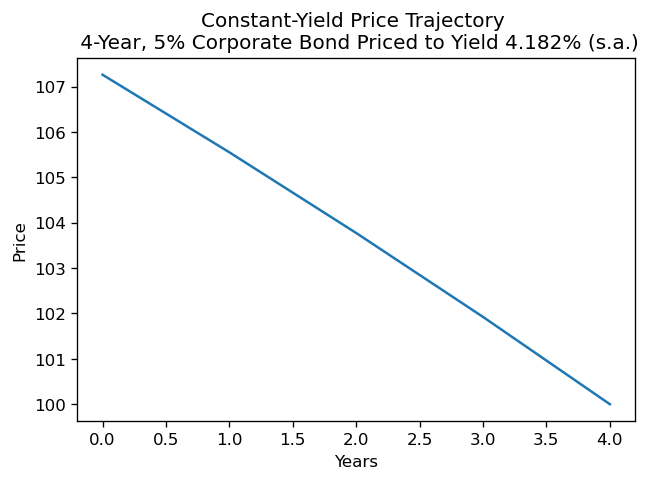

In [96]:
import matplotlib.pyplot as plt

years_x = np.arange(0, n+1)

pv_y = pv(ytm, years_x, coupon, face)

plt.figure(num=0, dpi=120)
plt.plot(4-years_x, pv_y)
plt.title('Constant-Yield Price Trajectory \n 4-Year, 5% Corporate Bond Priced to Yield 4.182% (s.a.)')
plt.xlabel('Years')
plt.ylabel('Price')

for i in range(5):
  print(f"Year {i} PV =", np.round(pv(ytm, 4-i, coupon, face), 3))

In [99]:
# After‐tax Rate of Return

income_tax = 0.434

constant_yield_price = [pv(ytm, 4-i, coupon, face) for i in range(n+1)]
amort_constant_yield_price = [constant_yield_price[i-1] - constant_yield_price[i] for i in range(1, n+1)]
coupon_at = [coupon - ((coupon - amort_constant_yield_price[i])*income_tax) for i in range(n)] # coupon after tax
coupon_at[-1] += face

def at_yield(price, cash_flow, discounting_factor, per):
    def present_value(true_yield, cash_flow, discounting_factor, per):
        discount_factors = (1 + true_yield / per) ** (-discounting_factor)
        return np.dot(cash_flow, discount_factors)
    def f(x):
        return present_value(true_yield=x, cash_flow=cash_flow, discounting_factor=discounting_factor, per=per) - price
    root = newton(f, 0.0, disp=False)
    return root

at_ytm = at_yield(price=price, cash_flow=np.array(coupon_at), discounting_factor=np.arange(1, n+1), per=1)
print(f'{at_ytm = :.5%}')

at_ytm = 2.26400%


### Original Issue Discount (OID) Bonds - Zero-Coupon Bonds

The key tax aspect of an OID bond is that the yearly movement along the constant‐yield price trajectory is the reported ordinary interest income to the investor and interest expense to the issuer.

An investor who buys and holds to maturity an OID bond will not have a capital gain because the discount will be taxed as ordinary income over the lifetime of the bond. The problem is that this is “phantom” income in that there is a tax liability each year despite the absence of a cash receipt to pay the tax. That creates a market segmentation effect—most zero‐coupon bonds such as Treasury STRIPS are owned by defined benefit pension funds or by individuals in their retirement savings accounts, for example, 401(k)s. 

The other significant aspect to OID taxation is that capital gains and losses are measured from the constant‐yield price trajectory if the bond is sold prior to maturity.

These tax rules for OID bonds match the economic fundamentals in that interest income is the price change caused purely by the passage of time. A capital gain or loss is the price movement caused by the change in value, meaning a change in the bond yield.

The investor’s after‐tax rate of return depends on the ordinary tax rates that prevail in each year and on the capital gains rate if the zero‐coupon bond is sold prior to maturity.

The investor *credits* interest income and *debits* the bond investment by the interest income generated through passage of time. Those entries raise the *carrying book value* (and the basis for taxation) of the zero‐coupon bond. The capital gain represents the profit from selling at a price above the carrying book value amount.

In [152]:
n_mat = 10
buy_price = 60
sell_price = 68
face = 100
n_sell = 2
per = 2 #semiannual compounding
ytm = ((face/buy_price)**(1/(n_mat*per)) - 1) * per
income_tax = 0.25
capital_tax = 0.15

horizon_yield = ((sell_price/buy_price)**(1/(n_sell*per)) - 1)*per
print(f'Holding Period Return {horizon_yield:.3%} (s.a.), {n_sell} years')

constant_yield_price = [face / ((1 + ytm/per)**((n_mat-i)*per)) for i in range(n_mat)]
taxable_int_income = [constant_yield_price[i] - constant_yield_price[i-1] for i in range(1, n_mat)]
income_tax = [inc * (income_tax) for inc in taxable_int_income]

for i in range(n_sell):
    print(f'Constant Yield Price ({ytm:.3%}) = {constant_yield_price[i+1]:0.3f}, year {i+1}')
    print(f'Taxable Interest Income {taxable_int_income[i]:0.3f}', f'Income Tax = {income_tax[i]:.3f}')

taxable_capital_gain = sell_price - constant_yield_price[2] 
capital_gain_tax = taxable_capital_gain * capital_tax
print(f'Capital Gains Tax = {capital_gain_tax:0.3f} on Capital Gain = {taxable_capital_gain:0.3f}')


at_cf = np.array([-income_tax[0], sell_price-capital_gain_tax-income_tax[1]])
period = np.arange(1, n_sell+1)

def aty(price, cash_flow, periods, per):
    def present_value(rate, cash_flow, periods, per):
        discount_factor = (1 + rate/per)**(-periods*per)
        return np.dot(cash_flow, discount_factor)
    def f(x):
        return present_value(rate=x, cash_flow=cash_flow, periods=periods, per=per) - price
    root = newton(f, 0, disp=False)
    return root

at_return = aty(price = buy_price, cash_flow=at_cf, periods=np.arange(1, n_sell+1), per=2)
print(f'After-Tax Rate of Return = {at_return:0.3%} (s.a.)')

Holding Period Return 6.357% (s.a.), 2 years
Constant Yield Price (5.174%) = 63.145, year 1
Taxable Interest Income 3.145 Income Tax = 0.786
Constant Yield Price (5.174%) = 66.454, year 2
Taxable Interest Income 3.309 Income Tax = 0.827
Capital Gains Tax = 0.232 on Capital Gain = 1.546
After-Tax Rate of Return = 4.912% (s.a.)


### Municipal Bonds

Municipal bonds (munis) issued by state and local governments in the U.S. are **exempt from federal taxation**. Additionally, if the investor resides in the issuer's locality, the investor may also be exempt from state and local income taxes.

Investors often evaluate a municipal bond based on its **equivalent taxable yield** (ETY) statistic. The intent is to be able to compare directly the yield on a tax‐exempt bond to otherwise comparable fully taxable corporate offerings. This comparison is not as easy as it might sound because the bond rating agencies have different criteria for each bond type—that is, a double A‐rated muni does not necessarily have the same projected probability of default (and recovery rate) as a double A‐rated corporate bond.

The commonly used ETY statistic, which we can call the *street* version because it is widely used in practice, is the *after‐tax yield divided by one minus the assumed ordinary income tax rate*. Note that the after‐tax yield on the muni is not just its quoted, or pretax, yield to maturity. When a muni is purchased at a premium or discount and either held to maturity or sold prior to maturity, there still are federal tax implications, it generates taxable capital gains and losses for de minimis OID bonds or ordinary income tax for OID bonds on the discount portion.

These taxes are not economically justified. In principle, the “gain” from buying at a market discount is just deferred interest income and should be tax exempt similar to the coupon payments. Two bonds issued by the same state government, maturing on the same date with the same credit risk should have the same after-tax yield to maturity despite their different coupon rates (differing due to liquidity, perhaps). However, the current tax regulation penalizes the lower coupon discount bond because its coupon deficiency is classified as gains and is taxed as ordinary income—not as tax-exempt interest income.

Equivalent taxable yield (ETY) - Street Version:
$$ETY = \frac{\text{After-Tax YTM}}{(1 - \text{Ordinary Income Tax Rate})}$$

Equivalent taxable yield (ETY) - Theoretical Version:
$$PV=\left(\frac{PMT}{1-\text{Oridnary Income Tax Rate}}\right)\left(\frac{1-(1+ETY)^{-N}}{ETY}\right)+\frac{FV}{(1+ETY)^N}$$

The second, theoretical version, solve for the internal rate of return on a taxable offering that generates the same after‐tax cash flows as the muni. Note that the redemption amount does not need to be adjusted because both the taxable corporate and the “tax‐exempt” muni face capital gains taxation on the de minimis OID or ordinary income tax on market discount bonds.

The latter function (or the expanded version of the closed-form function) allows for more flexibility in including **term structure of tax rates** over time as the investor's ordinary tax rate increases. To incorporate this assumption into the street ETY calculation, one could input some form of weighted average of the tax rates.

In [149]:
muni_n = 4
muni_face = 100
muni1_cpn = 0.04
muni1_price = 99.342 # qualifies for de minimis OID rule as discount < (4 x 0.25)
muni2_cpn = 0.01
muni2_price = 88.499 # OID classification 

income_tax = 0.25
capital_tax = 0.15

muni1_cf = np.full(muni_n, muni1_cpn*100)
muni1_cf[-1] += muni_face - (muni_face - muni1_price)*capital_tax # discount taxed as capital gains (de minimis OID)

muni2_cf = np.full(muni_n, muni2_cpn*100)
muni2_cf[-1] += muni_face - (muni_face - muni2_price)*income_tax # discount taxes as ordinary interest income

def aty(price, cash_flow, periods, per):
    def present_value(rate, cash_flow, periods, per):
        discount_factor = (1 + rate/per)**(-periods*per)
        return np.dot(cash_flow, discount_factor)
    def f(x):
        return present_value(rate=x, cash_flow=cash_flow, periods=periods, per=per) - price
    root = newton(f, 0, disp=False)
    return root

muni1_at_return = aty(price = muni1_price, cash_flow=muni1_cf, periods=np.arange(1, muni_n+1), per=1)
street_ety_muni1 = muni1_at_return / (1 - income_tax)
print(f'Muni 1: After-Tax Rate of Return = {muni1_at_return:0.3%} (annually), Equiv. Taxable Yield (ETY) = {street_ety_muni1:0.3%}')

muni2_at_return = aty(price = muni2_price, cash_flow=muni2_cf, periods=np.arange(1, muni_n+1), per=1)
street_ety_muni2 = muni2_at_return / (1 - income_tax)
print(f'Muni 2: After-Tax Rate of Return = {muni2_at_return:0.3%} (annually), Equiv. Taxable Yield (ETY) = {street_ety_muni2:0.3%}')

Muni 1: After-Tax Rate of Return = 4.159% (annually), Equiv. Taxable Yield (ETY) = 5.545%
Muni 2: After-Tax Rate of Return = 3.444% (annually), Equiv. Taxable Yield (ETY) = 4.592%


In [150]:
muni1_cf = np.full(muni_n, muni1_cpn*100)
muni1_cf[-1] += muni_face

muni2_cf = np.full(muni_n, muni2_cpn*100)
muni2_cf[-1] += muni_face

muni1_at_return = aty(price = muni1_price, cash_flow=muni1_cf, periods=np.arange(1, muni_n+1), per=1)
print(f'Muni 1: Pre-Tax Rate of Return = {muni1_at_return:0.3%} (annually)')

muni2_at_return = aty(price = muni2_price, cash_flow=muni2_cf, periods=np.arange(1, muni_n+1), per=1)
print(f'Muni 2: Pre-Tax Rate of Return = {muni2_at_return:0.3%} (annually)')

Muni 1: Pre-Tax Rate of Return = 4.182% (annually)
Muni 2: Pre-Tax Rate of Return = 4.182% (annually)


In [151]:
def aty(price, at_pmt, years, face):
    def present_value(rate, years, pmt, fv):
        old_settings = np.seterr(invalid='ignore')
        pvPMT = np.where(rate == 0, years, np.divide(1 - (1+rate)**-years, rate)) * pmt
        np.seterr(**old_settings)
        pvFV = fv / (1 + rate)**years
        return pvPMT + pvFV
    def f(x):
        return present_value(rate=x, years=years, pmt=at_pmt, fv=face) - price
    root = newton(f, 0, disp=False)
    return root

muni1_at_return = aty(price=muni1_price, at_pmt=(muni1_cpn*100)/(1-income_tax), years=muni_n, face=muni_face)
print(f'Muni 1: After-Tax Rate of Return = {muni1_at_return:0.3%} (annually)')

muni2_at_return = aty(price=muni2_price, at_pmt=(muni2_cpn*100)/(1-income_tax), years=muni_n, face=muni_face)
print(f'Muni 2: After-Tax Rate of Return = {muni2_at_return:0.3%} (annually)')

Muni 1: After-Tax Rate of Return = 5.521% (annually)
Muni 2: After-Tax Rate of Return = 4.542% (annually)


### Example - A Real Market Discount Corporate Bond

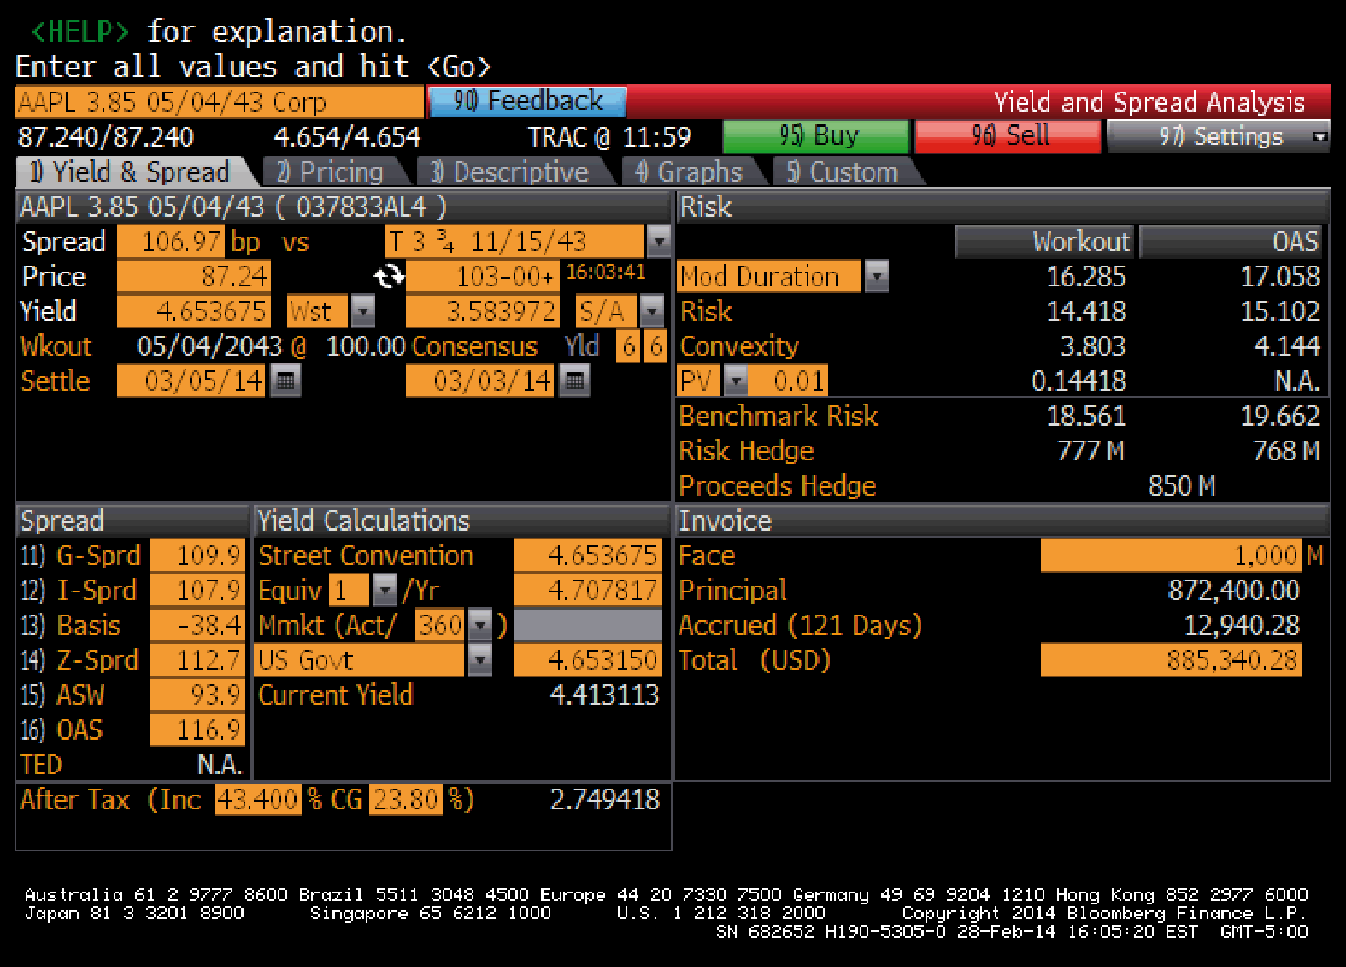

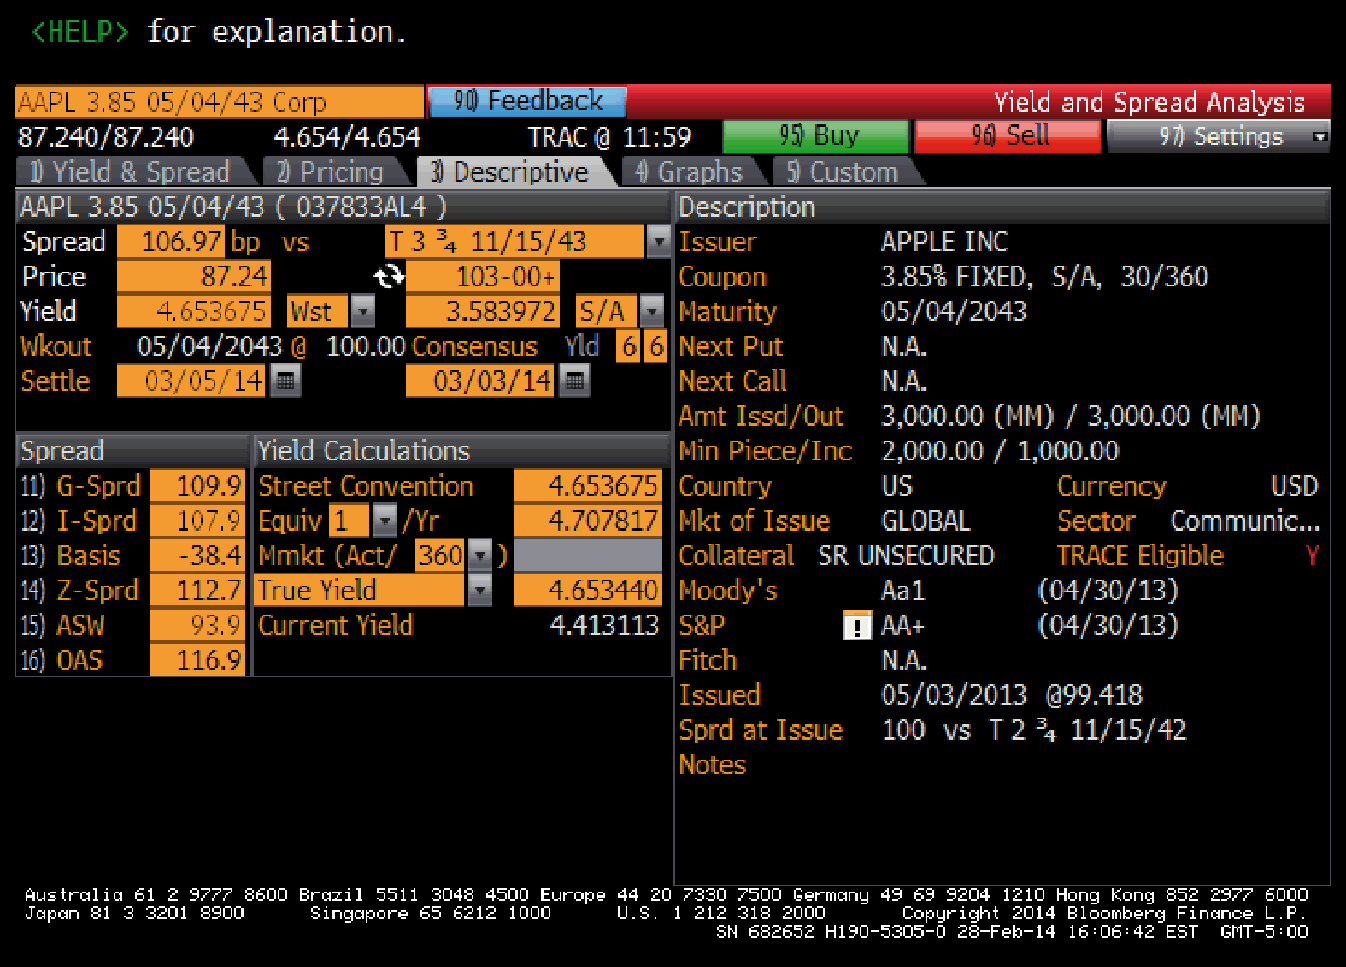

In [12]:
settlement = pd.to_datetime('2014-03-05')
maturity = pd.to_datetime('2043-05-04')
coupon = (3.85)/100
price = 87.24
face = 100
per = 2
daycount = 'thirty/360'

purchase_amount = 1_000_000 # in face value

# Flat (or clean) price 
flat_price = price * purchase_amount/face
print(f'flat_price = {round(flat_price,2):,}')

# Compute Accrued Interest
coupon_periods = bond_coupon_periods(settle=settlement, mat=maturity, freq=per, daycount=daycount)
accrued_interest = coupon_periods['accrual_fraction'] * coupon/per * purchase_amount
print(f'accrued_interest = {round(accrued_interest,2):,}')

# Compute Full (or Dirty) price
full_price = flat_price + accrued_interest
print(f'full_price = {round(full_price,2):,}')

# Compute Bond Yield - Street convention (on flat price)
street_yield = bond_yield(settle=settlement, cpn = coupon, mat=maturity, price=price, freq = per, redeem=face, daycount=daycount)
print(f'{street_yield = :%}')

# Effective rate
effective_rate = equiv_rate(street_yield, from_freq=2, to_freq=1)
print(f'{effective_rate = :%}')

# Current Yield
current_yield = (coupon*100)/(flat_price/10_000)
print(f'{current_yield = :%}')

# U.S. Government yield
tT_US = bond_coupon_periods(settle=settlement, mat=maturity, freq=per, daycount='actual/actual')['accrual_fraction']
us_yield = gov_equiv_yield(street_yield, coupon_periods['n']/per, pmt=coupon*100, price=full_price/10_000, fv=face, per=per, tT=tT_US)
print(f'{us_yield = :%}')

# Japanese simple yield
N = (maturity-settlement).days/366
simple_yield = ((coupon*100) / price) + ((face - price) / (N*price))
print(f'{simple_yield = :%}')

# After-Tax Yield - Approx
income_tax = 0.434
at_yield = bond_yield(settle=settlement, cpn =coupon*(1-income_tax), mat=maturity, price=price, freq = per, redeem=face-((face-price)*income_tax), daycount=daycount)
print(f'{at_yield = :%}')

# After-Tax Yield - Bloomberg (Capital Gains Tax on Redemption)
income_tax = 0.434
capital_gains_tax = 0.238
at_yield_bloom = bond_yield(settle=settlement, cpn =coupon*(1-income_tax), mat=maturity, price=price, freq = per, redeem=face-((face-price)*capital_gains_tax), daycount=daycount)
print(f'{at_yield_bloom = :%}')

coupon_periods
full_price/10_000

flat_price = 872,400.0
accrued_interest = 12,940.28
full_price = 885,340.28
street_yield = 4.653675%
effective_rate = 4.707817%
current_yield = 4.413113%
us_yield = 4.653150%
simple_yield = 4.915670%
at_yield = 2.686572%
at_yield_bloom = 2.749418%


np.float64(88.53402777777778)

In [9]:
# Comparable on-the-run Treasury note
settlement_T = pd.to_datetime('2014-03-03')
maturity_T = pd.to_datetime('2043-11-15')
coupon_T = (3 + 3/4)/100
flat_price_T = 103 + (0)/32 + 1/64
face_T = 100
per = 2
daycount_T = 'actual/actual'

yield_T = bond_yield(settle=settlement_T, cpn = coupon_T, mat=maturity_T, price=flat_price_T, freq = per, redeem=face_T, daycount=daycount_T)
print(f'{yield_T = :%}')

# Spread
spread1 = street_yield - yield_T
print(f'{spread1 = :%}')
spread2 = us_yield - yield_T
print(f'{spread2 = :%}')

yield_T = 3.583972%
spread1 = 1.069703%
spread2 = 1.069179%


In [18]:
# The investor’s projected after‐tax yield on a market discount bond
# U.S. investor elects to not bring the accrued market discount into income each year

def ayt(full_price, flat_price, coupon, n, tax, tT, redemption=100, freq=2):
  
  def pv(rate, n, installments, fv, flat_price, tT, tax, per):
    pmt = (installments/per)*(1-tax)
    r = rate/per
    fv = fv - (fv - flat_price)*tax    
    old_settings = np.seterr(invalid='ignore')
    pvInstallments = np.where(r == 0, n, np.divide(1 - (1+r)**-n, r)) * pmt
    np.seterr(**old_settings)
    pvFV = fv / (1 + r)**n
    atAI = (tT * installments/per * tax)/(1+r)
    
    return (pvInstallments + pvFV + atAI) * (1 + r)**tT
  
  def f(x):
    return pv(rate=x, n=n, installments=coupon, fv=redemption, flat_price=flat_price, tT=tT, tax=tax, per=freq) - full_price
  
  root = newton(f, 0, disp=False)
  
  return root

at_rate = ayt(full_price=full_price/10_000, flat_price=flat_price/10_000, coupon=coupon*100, redemption=face, n=coupon_periods['n'], freq=per, tax=0.434, tT=coupon_periods['accrual_fraction'])
print(f'{at_rate :%}')

2.686436%


### Example - Premium Bonds

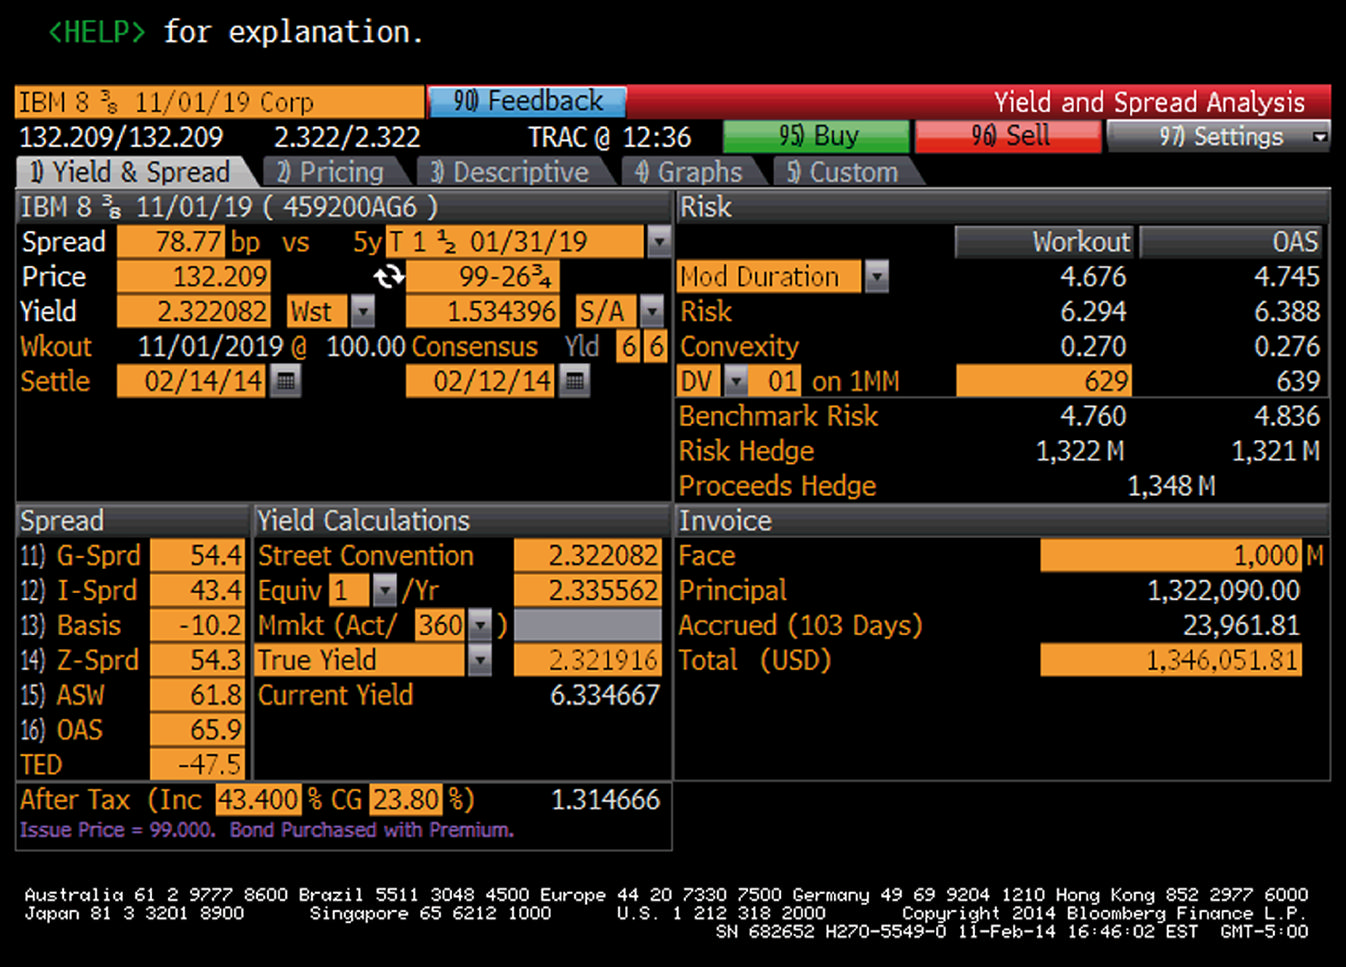

In [101]:
settlement = pd.to_datetime('2014-02-14')
maturity = pd.to_datetime('2019-11-01')
coupon = (8 + (3/8))/100
price = 132.209
face = 100
per = 2
daycount = 'thirty/360'

purchase_amount = 1_000_000 # in face value

# Flat (or clean) price 
flat_price = price * purchase_amount/face
print(f'flat_price = {round(flat_price,2):,}')

# Compute Accrued Interest
coupon_periods = bond_coupon_periods(settle=settlement, mat=maturity, freq=per, daycount=daycount)
accrued_interest = coupon_periods['accrual_fraction'] * coupon/per * purchase_amount
print(f'accrued_interest = {round(accrued_interest,2):,}')

# Compute Full (or Dirty) price
full_price = flat_price + accrued_interest
print(f'full_price = {round(full_price,2):,}')

# Compute Bond Yield - Street convention (on flat price)
street_yield = bond_yield(settle=settlement, cpn = coupon, mat=maturity, price=price, freq = per, redeem=face, daycount=daycount)
print(f'{street_yield = :%}')

# Effective rate
effective_rate = equiv_rate(street_yield, from_freq=2, to_freq=1)
print(f'{effective_rate = :%}')

# Current Yield
current_yield = (coupon*100)/(flat_price/10_000)
print(f'{current_yield = :%}')

# U.S. Government yield
tT_US = bond_coupon_periods(settle=settlement, mat=maturity, freq=per, daycount='actual/actual')['accrual_fraction']
us_yield = gov_equiv_yield(street_yield, coupon_periods['n']/per, pmt=coupon*100, price=full_price/10_000, fv=face, per=per, tT=tT_US)
print(f'{us_yield = :%}')

# Japanese simple yield
N = (maturity-settlement).days/366
simple_yield = ((coupon*100) / price) + ((face - price) / (N*price))
print(f'{simple_yield = :%}')

coupon_periods

flat_price = 1,322,090.0
accrued_interest = 23,961.81
full_price = 1,346,051.81
street_yield = 2.322082%
effective_rate = 2.335562%
current_yield = 6.334667%
us_yield = 2.324031%
simple_yield = 2.060190%


{'n': np.int64(12),
 'discounting_fraction': np.float64(0.42777777777777776),
 'accrual_fraction': np.float64(0.5722222222222222),
 'next_coupon': Timestamp('2014-05-01 00:00:00'),
 'prev_coupon': Timestamp('2013-11-01 00:00:00')}

In [148]:
# After Tax Yield
import pandas as pd
from prettytable import PrettyTable
from importlib import import_module
from scipy.optimize import newton

tax = 0.434

coupon_date = [settlement.date()]
discounting_fraction = coupon_periods['discounting_fraction']
discounting_factor = [0]
cf = [full_price/10_000]
constant_yield_price = [flat_price/10_000]
amort_constant_yield_price = [0]
at_cf = [full_price/10_000]
n = int(per * (maturity - settlement).days / 360)

for i in range(n, -1, -1):
    date = maturity + pd.tseries.offsets.DateOffset(months=-i * 12 /per)
    coupon_date.append(date.date())
    discounting_factor.append(n - i + discounting_fraction)        
    cf.append(coupon*100/2 if date < maturity else coupon*100/2 + face)
    constant_yield_price.append(bond_price(date, cpn=coupon, mat=maturity, yld=street_yield,freq=per,redeem=face,daycount=daycount))
    amort = constant_yield_price[-2] - constant_yield_price[-1]
    amort_constant_yield_price.append(amort)
    at_cf.append(coupon*100/2 - (coupon*100/2 - amort) * tax if date.date() != coupon_date[1] else coupon*100/2 - (coupon*100/2 - (coupon_periods['accrual_fraction']*coupon*100/2) - amort) * tax)

at_cf[-1] += face

def true_yield(price, cash_flow, discounting_factor, per):
    def present_value(true_yield, cash_flow, discounting_factor, per):
        discount_factors = (1 + true_yield / per) ** (-discounting_factor)
        return np.dot(cash_flow, discount_factors)
    def f(x):
        return present_value(x, cash_flow, discounting_factor, per) - price
    root = newton(f, 0, disp=False)
    return root

result = true_yield(price=full_price/10_000, cash_flow=np.array(at_cf[1:]), discounting_factor=np.array(discounting_factor[1:]), per=per)
print(f"Computed After-Tax IRR (adjusted for periodicity): {result:.6%}")

pv_at_cf = [at_cf[i]/(1+result/per)**discounting_factor[i] for i in range(len(coupon_date))]

table = PrettyTable()
table.add_column("Dates", coupon_date)
table.add_column("Cash Flow", list(map(lambda x: round(x, 4), cf)))
table.add_column("Constant Yield Price", list(map(lambda x: round(x, 4), constant_yield_price)))
table.add_column("Premium Amort.", list(map(lambda x: round(x, 4), amort_constant_yield_price)))
table.add_column("AT Cash Flows", list(map(lambda x: round(x, 4), at_cf)))
table.add_column("1 - t/T", list(map(lambda x: round(x, 4), discounting_factor)))
table.add_column("PV - AT Cash Flows", list(map(lambda x: round(x, 4), pv_at_cf)))
print(table)

Computed After-Tax IRR (adjusted for periodicity): 1.314215%
+------------+-----------+----------------------+----------------+---------------+---------+--------------------+
|   Dates    | Cash Flow | Constant Yield Price | Premium Amort. | AT Cash Flows | 1 - t/T | PV - AT Cash Flows |
+------------+-----------+----------------------+----------------+---------------+---------+--------------------+
| 2014-02-14 |  134.6052 |       132.209        |       0        |    134.6052   |    0    |      134.6052      |
| 2014-05-01 |   4.1875  |       131.084        |     1.125      |     3.8983    |  0.4278 |       3.8874       |
| 2014-11-01 |   4.1875  |       128.4185       |     2.6656     |     3.527     |  1.4278 |       3.4942       |
| 2015-05-01 |   4.1875  |       125.7219       |     2.6965     |     3.5404    |  2.4278 |       3.4846       |
| 2015-11-01 |   4.1875  |       122.9941       |     2.7278     |     3.554     |  3.4278 |       3.4751       |
| 2016-05-01 |   4.1875  | 